## Loading Data and visualizing.

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
# reading the dataset
raw_dataset = pd.read_csv('diabetes.csv')

# shape of data
print(f"Dataset shape: {raw_dataset.shape}")

# checking the first five rows of the dataset
raw_dataset.head()

Dataset shape: (768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [21]:
print("Dataset info:")
print(raw_dataset.info(), "\n")

print("Missing values in each column:")
print(raw_dataset.isnull().sum(), "\n")

# statistical summary of the dataset
print("Statistical summary of the dataset:")
print(raw_dataset.describe(), "\n")

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None 

Missing values in each column:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
Diabetes

Distribution of target variable (Outcome):
Outcome
0    500
1    268
Name: count, dtype: int64 



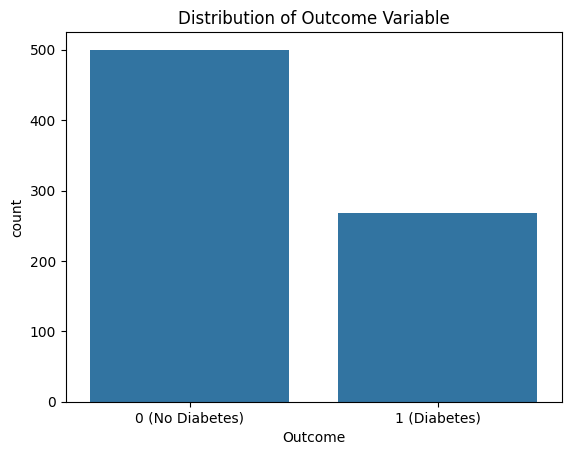

In [22]:
print("Distribution of target variable (Outcome):")
print(raw_dataset['Outcome'].value_counts(), "\n")

# checking the distribution of the target variable
sns.countplot(x='Outcome', data=raw_dataset)
plt.title('Distribution of Outcome Variable')
plt.xticks(ticks=[0, 1], labels=['0 (No Diabetes)', '1 (Diabetes)'])
plt.show()

In [23]:
# Summary statistics by outcome
print("\nSummary statistics by outcome:")
raw_dataset.groupby('Outcome').describe()


Summary statistics by outcome:


Pregnancies                                                Glucose  \
              count      mean       std  min   25%  50%  75%   max   count   
Outcome                                                                      
0             500.0  3.298000  3.017185  0.0  1.00  2.0  5.0  13.0   500.0   
1             268.0  4.865672  3.741239  0.0  1.75  4.0  8.0  17.0   268.0   

                     ... DiabetesPedigreeFunction           Age             \
               mean  ...                      75%    max  count       mean   
Outcome              ...                                                     
0        109.980000  ...                  0.56175  2.329  500.0  31.190000   
1        141.257463  ...                  0.72800  2.420  268.0  37.067164   

                                                  
               std   min   25%   50%   75%   max  
Outcome                                           
0        11.667655  21.0  23.0  27.0  37.0  81.0  
1        10.968254  21.0  28.0  36.0  44.0  70.0  

[2 rows x 64 columns]

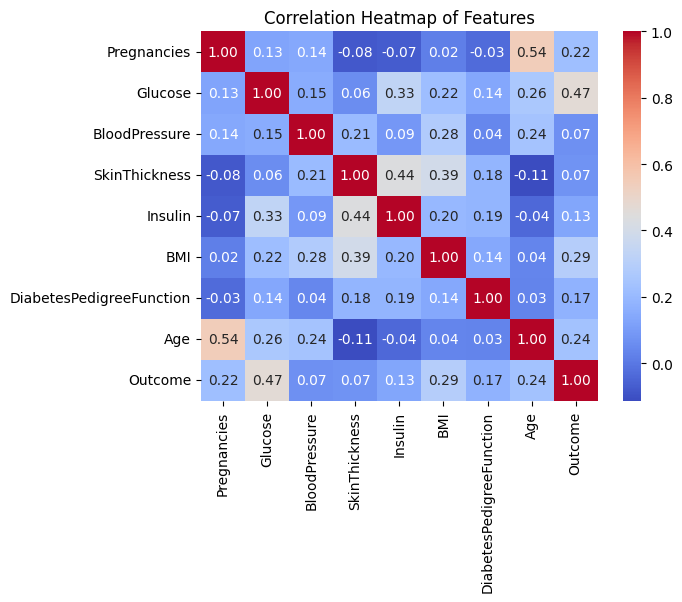

In [24]:
# creating correlation matrix and heatmap
correlation_matrix = raw_dataset.corr()
# sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap of Features')
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', annot_kws={"size": 10})
plt.show()

from heatmap, seems like glucose has most effect on outcome from this data along with minor other features that also affect the outcome.

## Splitting and Standardizing the data

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [26]:
# Splitting the data into features and target variable based on correlation insights
X = raw_dataset.drop(columns=['SkinThickness', 'BloodPressure', 'Outcome'])  # Dropping less relevant features
y = raw_dataset['Outcome']

print(X.head())

# print(X.columns)

   Pregnancies  Glucose  Insulin   BMI  DiabetesPedigreeFunction  Age
0            6      148        0  33.6                     0.627   50
1            1       85        0  26.6                     0.351   31
2            8      183        0  23.3                     0.672   32
3            1       89       94  28.1                     0.167   21
4            0      137      168  43.1                     2.288   33


In [27]:
# checking the shape of the dataset
print("Raw dataset shape:", raw_dataset.shape)
print("Features shape:", X.shape)
print("Target shape:", y.shape)

Raw dataset shape: (768, 9)
Features shape: (768, 6)
Target shape: (768,)


In [28]:
# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# print the shape of the train and test sets
print("\nTrain and Test set shapes:")
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


Train and Test set shapes:
X_train shape: (614, 6)
X_test shape: (154, 6)
y_train shape: (614,)
y_test shape: (154,)


In [29]:
# Scaling the features
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Scaling completed.")
print(f"Shape of X_train_scaled: {X_train_scaled.shape}")
print(f"Shape of X_test_scaled: {X_test_scaled.shape}")

Scaling completed.
Shape of X_train_scaled: (614, 6)
Shape of X_test_scaled: (154, 6)


## Training model

Using logistic regression model first

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [31]:
logReg = LogisticRegression(random_state=42, max_iter=200)
logReg.fit(X_train_scaled, y_train)
y_pred_logReg = logReg.predict(X_test_scaled)
accuracy_logReg = accuracy_score(y_test, y_pred_logReg)
print(f"\nLogistic Regression Accuracy: {accuracy_logReg:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred_logReg))


Logistic Regression Accuracy: 0.7143
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.83      0.79       100
           1       0.61      0.50      0.55        54

    accuracy                           0.71       154
   macro avg       0.68      0.67      0.67       154
weighted avg       0.71      0.71      0.71       154



Confusion Matrix:
 [[83 17]
 [27 27]]


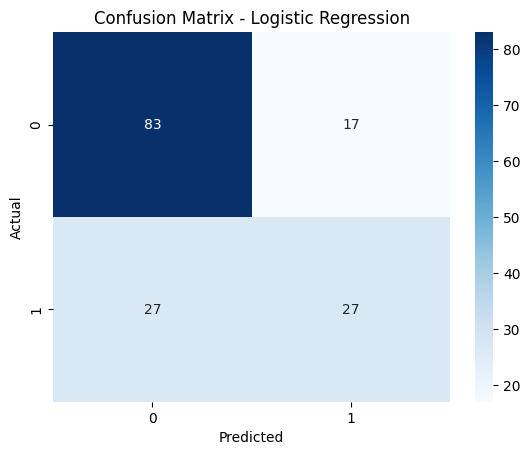

In [32]:
confusion_logReg = confusion_matrix(y_test, y_pred_logReg)
print("Confusion Matrix:\n", confusion_logReg)
sns.heatmap(confusion_logReg, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Using SVM linear and rbf kernel

In [33]:
from sklearn.svm import SVC

# Using SVM with linear kernel
svm_linear = SVC(kernel='linear', random_state=42)
svm_linear.fit(X_train_scaled, y_train)
y_pred_svm_linear = svm_linear.predict(X_test_scaled)
accuracy_svm_linear = accuracy_score(y_test, y_pred_svm_linear)
print(f"\nSVM (Linear Kernel) Accuracy: {accuracy_svm_linear:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred_svm_linear))


SVM (Linear Kernel) Accuracy: 0.6948
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.81      0.78       100
           1       0.58      0.48      0.53        54

    accuracy                           0.69       154
   macro avg       0.66      0.65      0.65       154
weighted avg       0.69      0.69      0.69       154



Confusion Matrix:
 [[81 19]
 [28 26]]


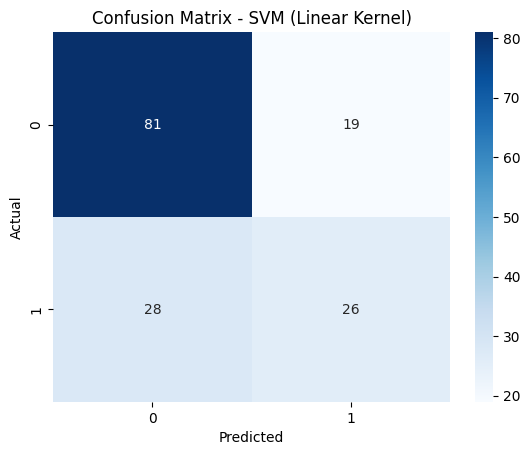

In [34]:
confusion_svm_linear = confusion_matrix(y_test, y_pred_svm_linear)
print("Confusion Matrix:\n", confusion_svm_linear)
sns.heatmap(confusion_svm_linear, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - SVM (Linear Kernel)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [35]:
# Using the SVM with RBF kernel
svm_rbf = SVC(kernel='rbf', random_state=42)
svm_rbf.fit(X_train_scaled, y_train)
y_pred_svm_rbf = svm_rbf.predict(X_test_scaled)
accuracy_svm_rbf = accuracy_score(y_test, y_pred_svm_rbf)
print(f"\nSVM (RBF Kernel) Accuracy: {accuracy_svm_rbf:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred_svm_rbf))


SVM (RBF Kernel) Accuracy: 0.7338
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.84      0.80       100
           1       0.64      0.54      0.59        54

    accuracy                           0.73       154
   macro avg       0.71      0.69      0.69       154
weighted avg       0.73      0.73      0.73       154



Confusion Matrix:
 [[84 16]
 [25 29]]


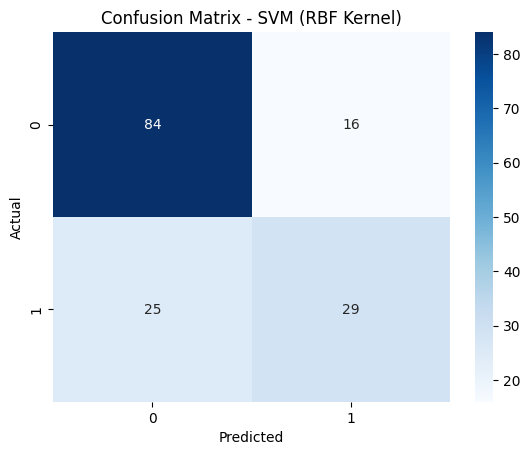

In [36]:
confusion_svm_rbf = confusion_matrix(y_test, y_pred_svm_rbf)
print("Confusion Matrix:\n", confusion_svm_rbf)
sns.heatmap(confusion_svm_rbf, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - SVM (RBF Kernel)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#### best accuracy is svm model with rbf kernel.

Will dump this model into a pickle file to be used in the streamlit app.

In [37]:
import pickle

model_artifacts = {
    'scaler' : scaler,
    'model' : svm_rbf
}

filename = 'diabetes_model.pkl'

with open(filename, 'wb') as file:
    pickle.dump(model_artifacts, file)

print(f"Model artifacts saved as {filename}")

Model artifacts saved as diabetes_model.pkl
